# Analysis of the PLAICRAFT Dataset

Author: Liam Murray | 87357539 \
Project Start: May 20th, 2025


### Introduction 👋

<!-- Background: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

Question(s): clearly state the question you tried to answer with your project. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear.

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need.  -->

#### What is PLAICraft?

Minecraft was first introduced in 2011 as a "sandbox game" where players could explore, build, and survive within a three-dimensional world [[1]](#1). As of 2025, Minecraft is the best-selling video game of all time with three hundred million units sold [[2]](#2). At the University of British Columbia (UBC), the [Pacific Laboratory for Artificial Intelligence (PLAI)](https://plai.cs.ubc.ca/) collected data on how people play video games by recording players actions while on a multiplayer Minecraft server named ["PLAICraft"](https://plaicraft.ai/) [[3,4]](#3).

#### What are we asking?

In an effort to increase the sample size for their research through recruiting efforts, PLAI has an interest in predicting players demographics that correlate with more gameplay on the server. This interest was formed into the following research question:

> Can a players age, gender, and experience predict their contribution to the PLAI Minecraft server through how many hours they play on the server?

Our goal is to create a k-nearest neighbors regression model than can accurately predict these values, so that the PLAI team can anticipate the data collected by users when they register.

#### What data were we working with?

The PLAICraft data released to us included two files, both datasets were combined using users hashed emails, so both have been summarized below.

<!-- `players.csv` - this file includes anonymized information about players age, gender, Minecraft experience level, hours played on PLAICraft, and their newsletter subscription status. The file also includes players names and hashed email addresses, though this data was likely only recorded for record-keeping. -->

`players.csv` - This dataset includes anonymized information about individual players who registered on the PLAICraft server.

- There was a total of 196 observations recorded in this dataset, reflective of the players registered on the server.
  - Players were aged between 8 and 50 years old.
  - 63.27% of players identified as male, 18.88% identified as female, and 17.85% identified as Non-binary, Agender, Two-Spirited or other.
- There are 7 variables present in this dataset, which included Outcome, Categorical, and Label variables.

<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;;width:100%;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7btt">Variable Type</th>
    <th class="tg-7btt">Variable Name</th>
    <th class="tg-fymr">Explanation</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-btxf" rowspan="2">Outcome variables</td>
    <td class="tg-btxf"><code>played_hours</code></td>
    <td class="tg-btxf" rowspan="2">These variables could be reflective of the categorical behaviours of players, and could be modeled for using categorical variables.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><code>subscribe</code></td>
  </tr>
  <tr>
    <td class="tg-btxf" rowspan="3">Categorical variables</td>
    <td class="tg-btxf"><code>age</code></td>
    <td class="tg-btxf" rowspan="3">These variables can be used to group participants by varying demographics, which could be effectively used to model players on the server.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>gender</code></span></td>
  </tr>
  <tr>
    <td class="tg-btxf"><span style="font-weight:400;font-style:normal"><code>experience</code></span></td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="2">Label variables</td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>hashedEmail</code></span></td>
    <td class="tg-0pky" rowspan="2">These variables are used to identify and track individual participants, these would likely not be useful for modeling and were only collected for participant registration.</td>
  </tr>
  <tr>
    <td class="tg-btxf"><span style="font-weight:400;font-style:normal"><code>name</code></span></td>
  </tr>
</tbody></table>

`sessions.csv` - This dataset provides information on each recorded game session on the PLAICraft server. This dataset differentiated players by associating each session with a hashed email address.

- There was a total of 1535 observations recorded in this dataset, which each represent one gaming session on the PLAICraft server.
  - If filtered for sessions greater than 0 minutes, the mean session length is 50.86 minutes, with the shortest and longest being 3 and 259 mins respectively.
- There are 5 variables present in this dataset, though there is repetition due to the time information being saved in both a standard time-date format and [Epoch Unix Timestamps](https://en.wikipedia.org/wiki/Unix_time).

<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;width:100%;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7btt">Variable Name</th>
    <th class="tg-fymr">Explanation</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-btxf"><code>hashedEmail</code></td>
    <td class="tg-btxf">This securely identifies the player who is being recorded.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><code>start_time</code></td>
    <td class="tg-0pky" rowspan="2">These variables record the start and end time of sessions, and are converted into a human-readable Date and Time format.</td>
  </tr>
  <tr>
    <td class="tg-btxf"><code>end_time</code></td>
  </tr>
  <tr>
    <td class="tg-0pky"><code>original_start_time</code></td>
    <td class="tg-0pky" rowspan="2">These variables record the start and end time of sessions, which were saved as Epoch Unix Timestamps.</td>
  </tr>
  <tr>
    <td class="tg-btxf"><code>original_end_time</code></td>
  </tr>
</tbody>
</table>
<!-- `sessions.csv` - this file provides information on each recorded game session on the PLAICraft server, including the player (via hashed email), and the start and end times (both the unix time stamp and the adjusted calendar date and time). -->


### Methods and Results 🛠️

<!-- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
performs the data analysis. For your analysis, you should think about and provide a brief explanation of the following questions:
Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How did you compare and select the model?
Note: you should also think about the following:
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis
note: all figures should have a figure number and a legend -->


#### Loading Libraries and Data 📂

The libraries used in this analysis are as follows:

<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;;width:100%;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7btt">Library</th>
    <th class="tg-fymr">Purpose</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-btxf"><code>tidyverse</code></td>
    <td class="tg-btxf">Includes functions for data wrangling, and includes <code>hms</code> to make analysis of time data easier.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>tidymodels</code></span></td>
    <td class="tg-0pky">Includes the necessary tools to complete regressions and classifications using both linear and k-nearest neighbor algorithms.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>janitor</code></span></td>
    <td class="tg-0pky">Includes helper classes (like <code>clean_names()</code>) to create tidier column titles.</td>
  </tr>
</tbody>
</table>

#### Cleaning the data 🧼

The datasets were loaded directly from `.csv` files, as they were distributed through Canvas links. Each dataset was then cleaned to remove redundancy and increase simplicity.

For `sessions.csv`:

1. Clean column names with `janitor`.
2. Keep only used variables (`hashed_email` and non-unix times).
3. Mutate times as `dmy_hm` date-time measurements.
4. Calculate session_length for each session.

For `players.csv`:

1. Clean column names with `janitor`.
2. Mutate `gender, experience, subscribe` variables as factors to simplify grouping.

To be able to access information across datasets, `session_data` and `player_data` were merged by the shared `hashed_email` variable. This action results in a tidy dataset as:

✅ - Each row is a single observation (each observation is a single gaming session that includes the players information) \
✅ - Each column is a single variable (the only overlap in variables is `hashed_email` whiched we merged by). \
✅ - Each cell is a single measurement.


In [90]:
# Import Libraries
library(tidyverse)
require(gridExtra)
require(janitor)

# Regression Libraries
library(tidymodels)

# Plot visual libraries
library(ggrepel)
library(ggtext)
library(RColorBrewer)

# Font libraries
library(latex2exp)
library(showtext)
font_add_google("Lato")
showtext_auto()

In [91]:
session_data <- read_csv("data/sessions.csv") |>
    clean_names() |>
    select(hashed_email:end_time) |>
    mutate(start_time = dmy_hm(start_time)) |>
    mutate(end_time = dmy_hm(end_time)) |>
    mutate(session_length = end_time - start_time)

player_data <- read_csv("data/players.csv") |>
    clean_names() |>
    mutate(gender = factor(gender, levels=c("Male","Female", "Non-binary", "Two-Spirited", "Agender", "Other", "Prefer not to say"))) |>
    mutate(experience = as_factor(experience)) |>
    mutate(subscribe = as_factor(subscribe))

# Merge the player and session data, by connecting the hashed_email variable.
merged_data <- merge(x = session_data, y = player_data, by = "hashed_email") |>
    na.omit() # Remove any missing data.

slice_sample(merged_data, n=10)


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashed_email,start_time,end_time,session_length,experience,subscribe,played_hours,name,gender,age
<chr>,<dttm>,<dttm>,<drtn>,<fct>,<fct>,<dbl>,<chr>,<fct>,<dbl>
9955ab948064150d3686ef564389bdc6d6c60bc620a5ce3084b3dec4a7a006a7,2024-04-24 20:04:00,2024-04-24 20:37:00,33 mins,Amateur,TRUE,0.4,Charlie,Two-Spirited,17
b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58,2024-08-15 00:27:00,2024-08-15 00:42:00,15 mins,Veteran,TRUE,12.5,Isidore,Agender,27
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-05-27 00:37:00,2024-05-27 01:11:00,34 mins,Regular,TRUE,223.1,Hiroshi,Male,17
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,2024-08-01 06:54:00,2024-08-01 08:54:00,120 mins,Regular,TRUE,218.1,Akio,Non-binary,20
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,2024-09-09 22:51:00,2024-09-10 00:40:00,109 mins,Pro,TRUE,30.3,Morgan,Male,9
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,2024-06-05 01:54:00,2024-06-05 02:02:00,8 mins,Amateur,TRUE,32.0,Sidney,Male,22
a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,2024-09-10 02:35:00,2024-09-10 03:22:00,47 mins,Amateur,TRUE,48.4,Xander,Female,17
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-03 06:22:00,2024-07-03 06:27:00,5 mins,Amateur,TRUE,56.1,Dana,Male,23
336adf9b9070abb44eaec22a48b04d8cda6cf0c98a46eef37779a1dcb6f5b4bb,2024-09-09 04:01:00,2024-09-09 04:57:00,56 mins,Regular,TRUE,4.0,Scarlett,Male,21


#### Setting Themes and Aesthetics 🎨

The plotting aestetics for this project were adapted from the work of [Cedric Scherer](https://www.cedricscherer.com/), with the original repository available [here](https://github.com/z3tt/TidyTuesday/blob/main/R/2020_52_BigMacIndex.Rmd).

In [92]:
# This project adapts the 'theme_minimal' included with ggplot2, with Lato as the base font.
theme_set(theme_minimal(base_family = "Lato"))


theme_update(
  # Set axis title style
  axis.title = element_text(color = "grey20", size = 21),
  axis.title.x = element_text(, margin = margin(t = 10)),
  axis.title.y = element_text(, margin = margin(r = 10)),

  # Set axis label style
  axis.text = element_text(color = "grey40"),
  axis.text.x = element_text(size = 17, margin = margin(t = 5)),
  axis.text.y = element_text(size = 17, margin = margin(r = 5)),

  # Set plot title style
  plot.title = element_text(
    color = "grey10",
    size = 28,
    face = "bold",
    margin = margin(t = 15)
  ),
  # Set plot subtitle style
  plot.subtitle = element_markdown(
    color = "grey30",
    size = 16,
    lineheight = 1.35,
    margin = margin(t = 15, b = 40)
  ),
  # Set plot caption style and alignment
  plot.title.position = "plot",
  plot.caption.position = "plot",
  plot.caption = element_text(
    color = "grey30",
    size = 13,
    lineheight = 1.2,
    hjust = 0,
    margin = margin(t = 40) # Large margin on the top of the caption.
  ),

  # Set plot margins (trbl format)
  plot.margin = margin(20, 40, 20, 40),

  # Set plot backgroup style
  plot.background = element_rect(fill = "grey98", color = "grey98"),
  panel.background = element_rect(fill = "grey98", color = "grey98"),

  # Set facet labels style
  strip.text.x = element_text(color = "grey40", size = 17),
  strip.text.y = element_text(color = "grey40", size = 17),

  # Set plot legend style
  legend.title = element_text(size = 17, color = "grey30"),
  legend.text = element_text(size=15, color = "grey40")
)

# Set default colour pallets using

options(
  ggplot2.discrete.colour = c("#084081", "#0868ac", "#2b8cbe", "#4eb3d3", "#7bccc4", "#a8ddb5", "#ccebc5", "#e0f3db", "#f7fcf0"), 
  ggplot2.discrete.fill = c("#084081", "#0868ac", "#2b8cbe", "#4eb3d3", "#7bccc4", "#a8ddb5", "#ccebc5", "#e0f3db", "#f7fcf0")
  )

annotation_colour <- "#0868ac"


#### Exploratory Data Analysis 🚀

> Can a players age, gender, and experience predict their contribution to the PLAI Minecraft server through how many hours they play on the server?

Looking at our research question above, there are some relationships that we want to explore before diving into creating a regression model:

- Is there a relationship between a players age and gender and the time they spend on the server?
  - It could be possible that a players age impacts the time they have available for the server, for example a working professional likely has less free time than a high school student.
- Is there a relationship between experience and the amount of time spent on the PLAICraft server?
  - It could be more likely that experienced players would commit more time to the server, as they are already invested in the game.

In the plots below, we explore these questions as the basis of our larger research question.

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


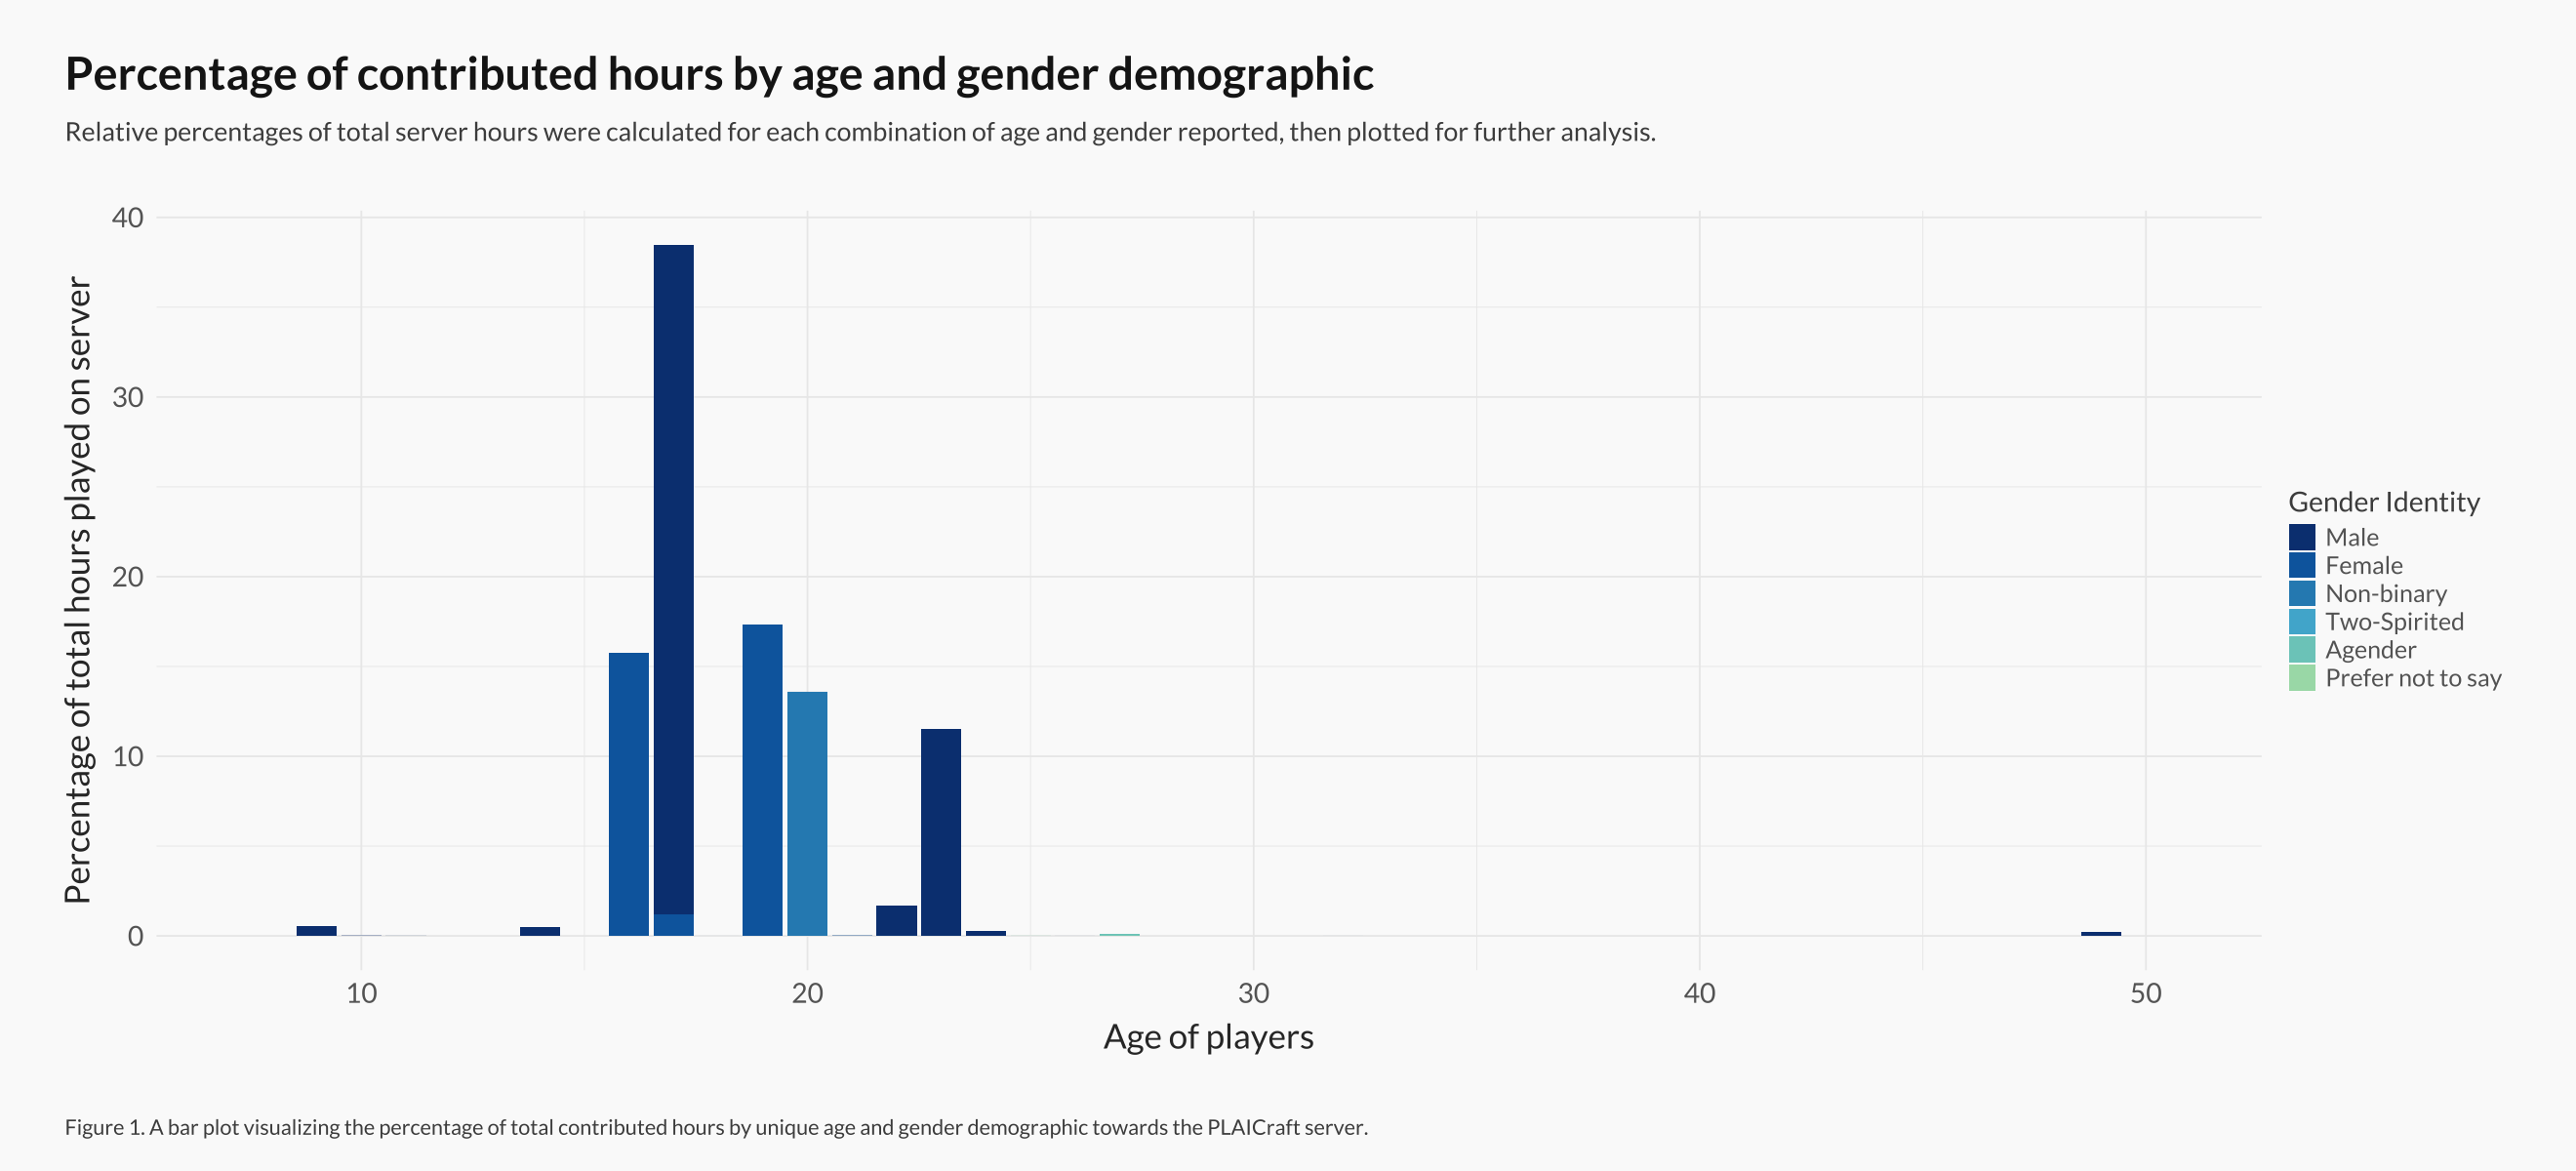

[1] 0.6068235


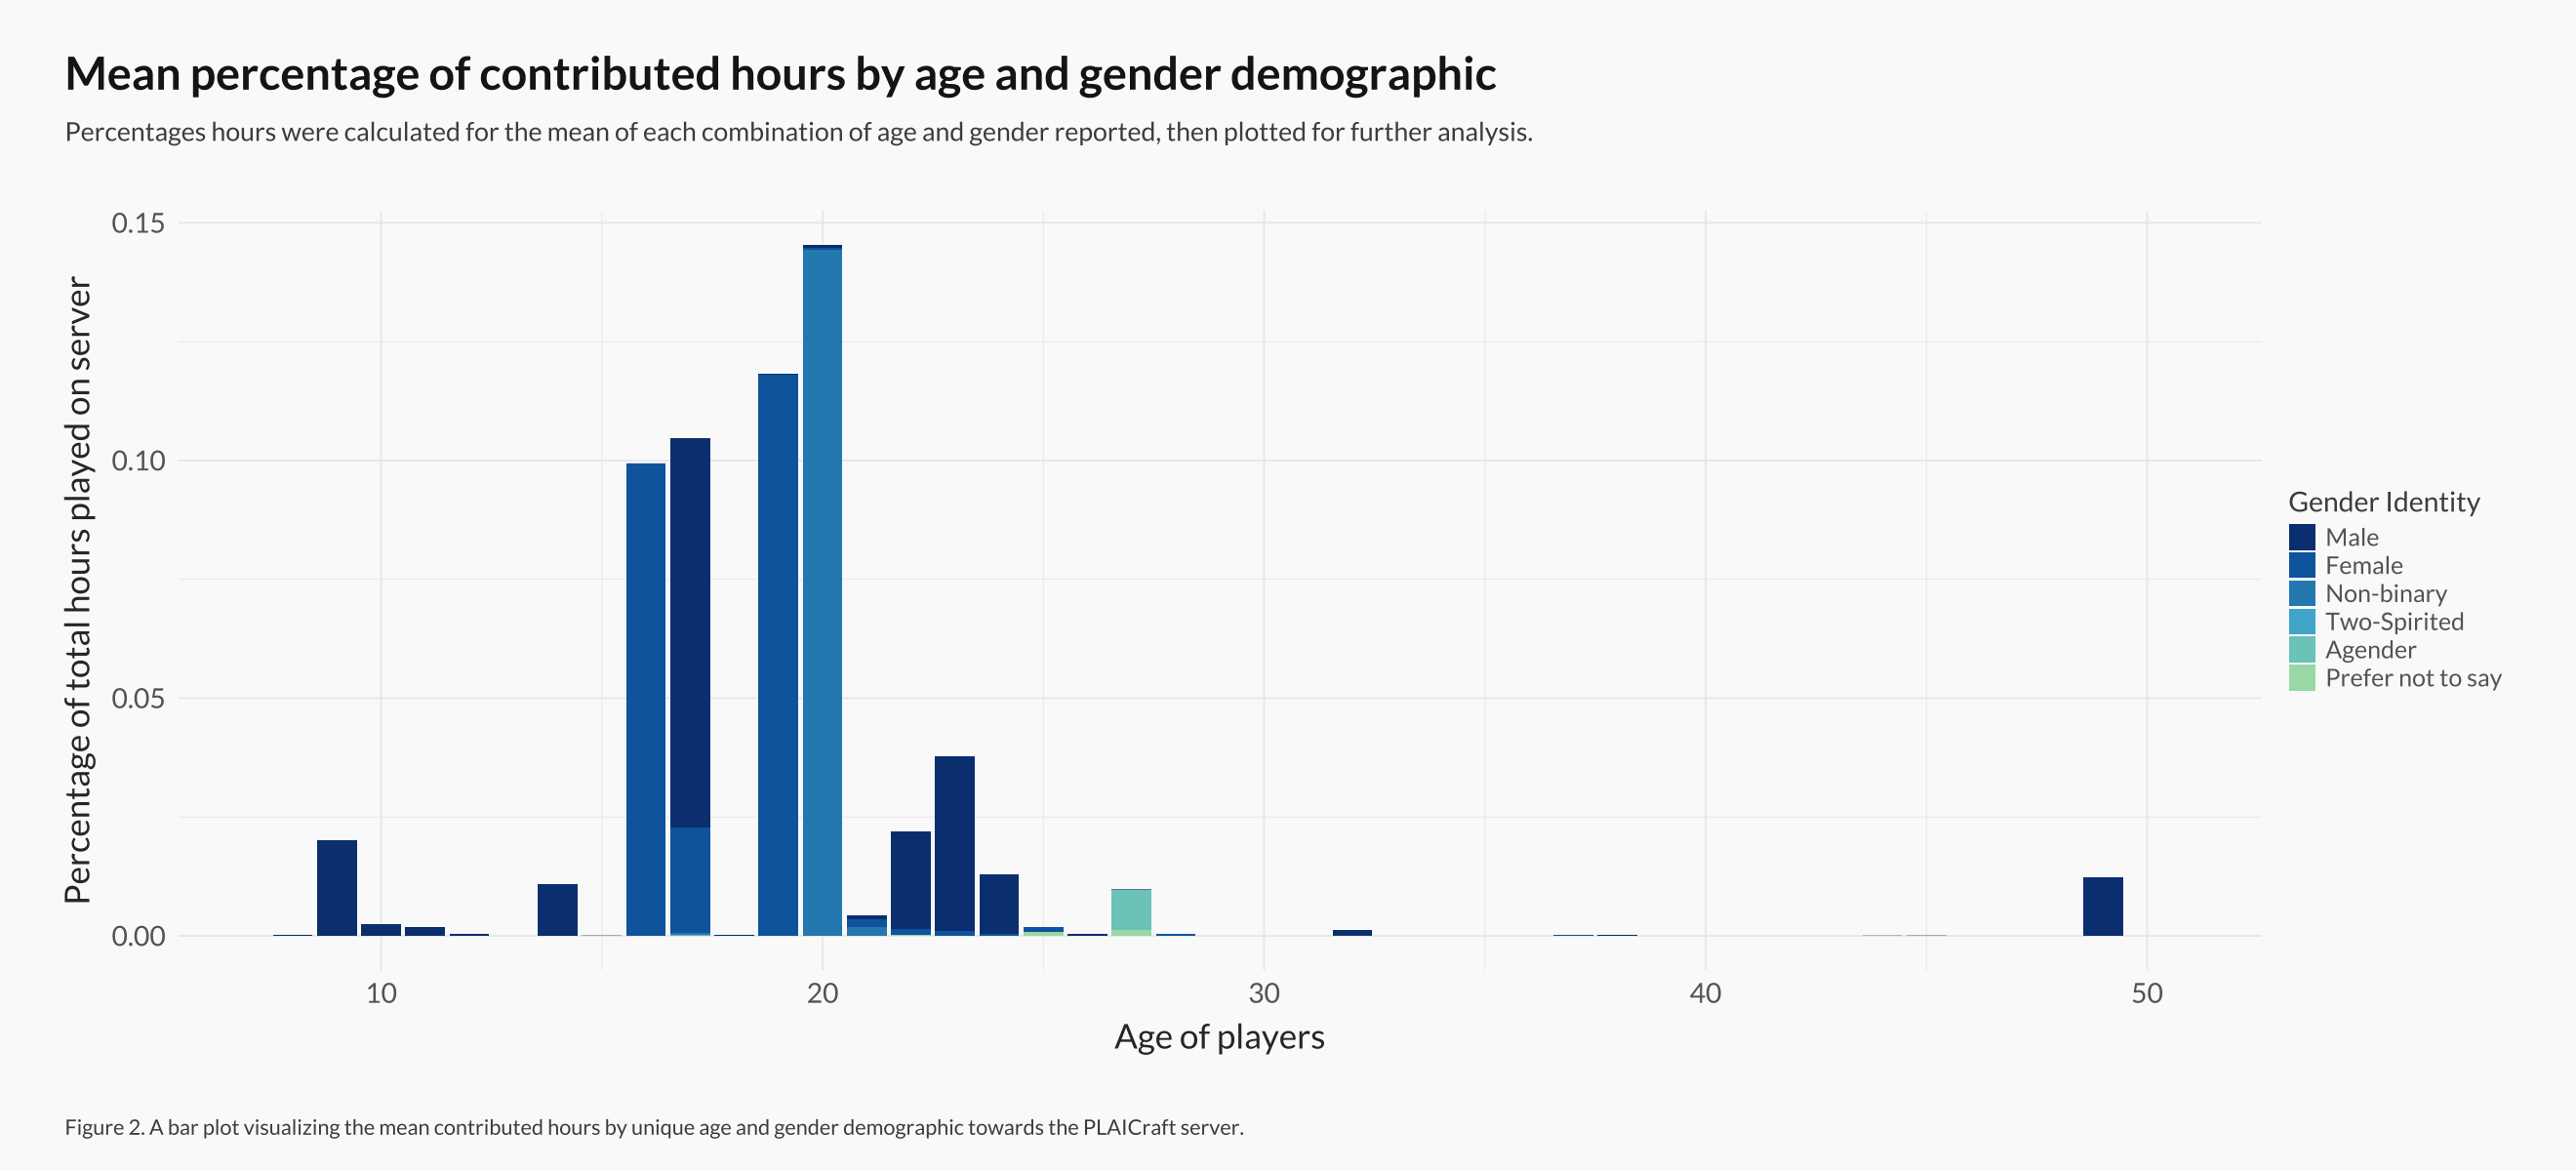

In [93]:
# Exploring age and gender as factors for gameplay contributions

options(repr.plot.width = 22, repr.plot.height = 10)

total_recorded_hours <- sum(merged_data$played_hours)

# Look at the total % contributions by each group
contribution_data <- merged_data |>
    na.omit() |>
    group_by(age, gender) |>
    summarize(mean_hours = mean(played_hours), group_contribution = sum(played_hours) / total_recorded_hours * 100, mean_contribution = mean(played_hours) / total_recorded_hours * 100) |>
    arrange(-group_contribution)

# contribution_data

group_contribution_graph <- contribution_data |>
    ggplot(aes(y=group_contribution, x=age, fill=gender)) +
        geom_bar(stat="identity", position = "stack") +
        # facet_grid(cols = vars(gender)) +
        labs(
            title = "Percentage of contributed hours by age and gender demographic",
            subtitle = "Relative percentages of total server hours were calculated for each combination of age and gender reported, then plotted for further analysis.",
            x = "Age of players",
            y = "Percentage of total hours played on server",
            fill = "Gender Identity",
            caption = "Figure 1. A bar plot visualizing the percentage of total contributed hours by unique age and gender demographic towards the PLAICraft server."
        )

group_contribution_graph

# Look at the mean individual % contributions by each group
mean_contribution_graph <- contribution_data |>
    ggplot(aes(y=mean_contribution, x=age, fill = gender)) +
        geom_bar(stat="identity", position = "stack") +
        # geom_point(alpha = 0.7, size = 4, aes(color=gender, shape = gender)) +
        # facet_grid(cols = vars(gender)) +
        labs(
            title = "Mean percentage of contributed hours by age and gender demographic",
            subtitle = "Percentages hours were calculated for the mean of each combination of age and gender reported, then plotted for further analysis.",
            x = "Age of players",
            y = "Percentage of total hours played on server",
            fill = "Gender Identity",
            caption = "Figure 2. A bar plot visualizing the mean contributed hours by unique age and gender demographic towards the PLAICraft server."
        )

mean_contribution_graph

print(sum(contribution_data$mean_contribution))

# mean_hours_plot


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


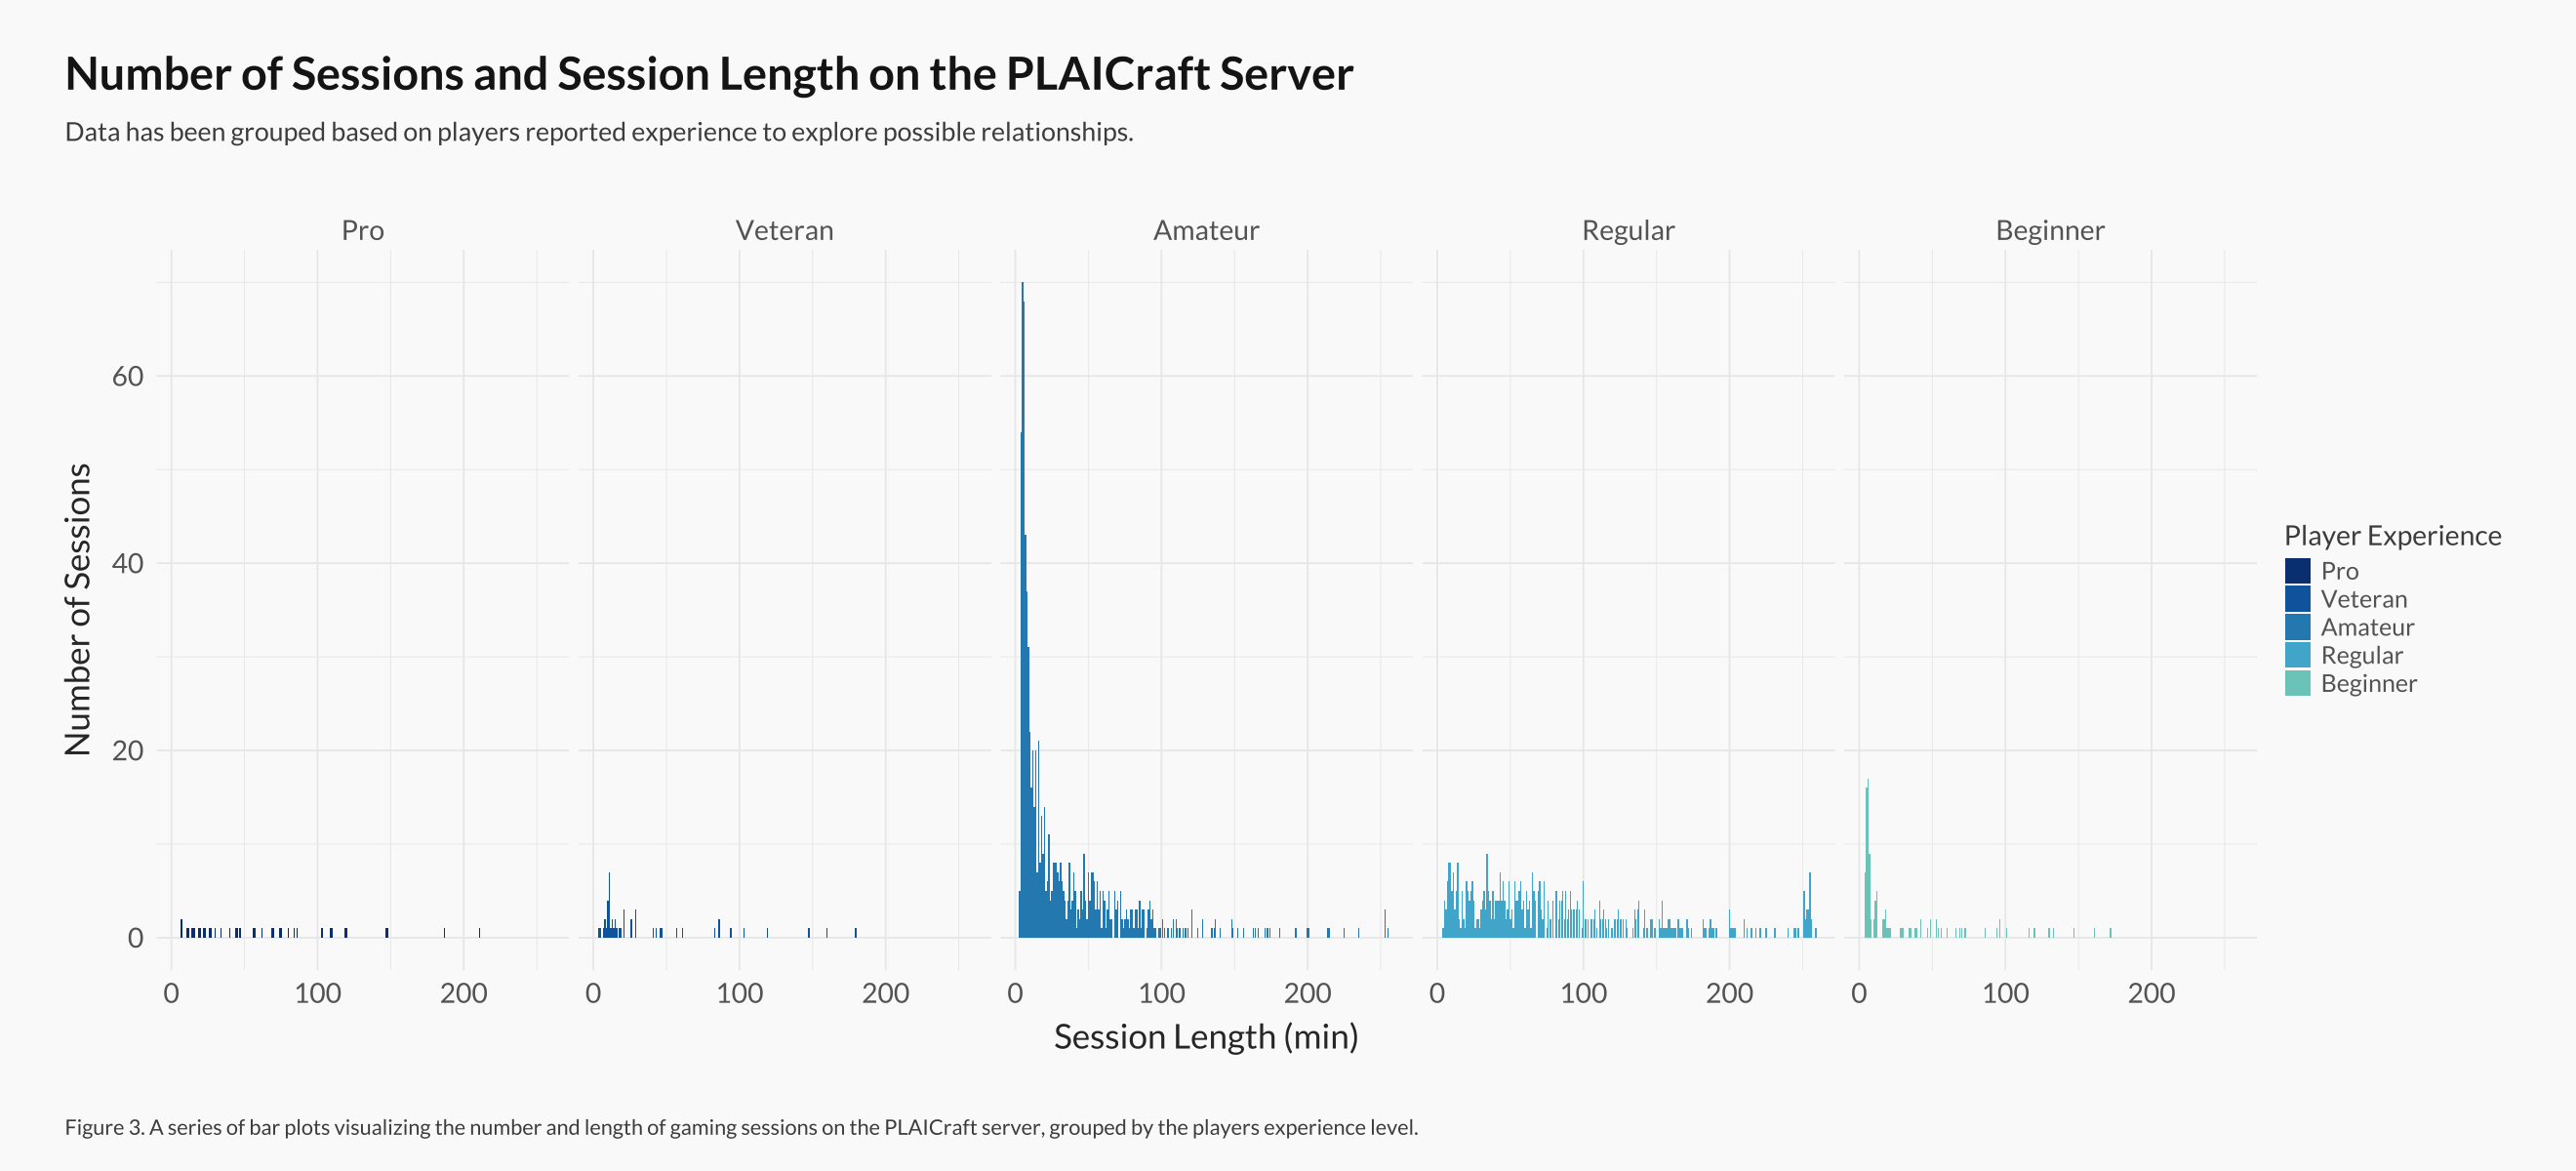

In [94]:
# Exploring how experience relates to the time spend on the server
session_info_plt <- merged_data |>
    # ggplot(aes(x=age, y=session_length, color=played_hours)) +
    #     geom_point() +
    #     facet_grid(rows=vars(experience))
    group_by(experience, session_length) |>
    summarize(count = n()) |>
    ggplot(aes(x = session_length, y = count, fill = experience)) +
    geom_histogram(stat = "identity") +
    # facet_wrap(~experience, ncol=5) +
    facet_grid(cols = vars(experience)) +
    labs(
        title = "Number of Sessions and Session Length on the PLAICraft Server",
        subtitle = "Data has been grouped based on players reported experience to explore possible relationships.",
        x = "Session Length (min)",
        y = "Number of Sessions",
        fill = "Player Experience",
        caption = "Figure 3. A series of bar plots visualizing the number and length of gaming sessions on the PLAICraft server, grouped by the players experience level."
    )

session_info_plt


#### Exploratory Findings 🔬

When analyzing the data contributed to the server by each group (vizualized by `group_contribution_graph` and `mean_contribution_graph`), we found the following trends:

It was predominantly university-aged males who contributed to the PLAICraft server, with female university-aged players being the second largest contributers. This may be the result of sampling bias, due to the strategy of recruiting students through UBC's DSCI courses which would have a large proportion of males aged 16-21. When comparing the total contributions to the mean contributions, there is a unique reversal in university-aged males becoming the 3rd highest group. Non-binary players aged 20 and female players aged 19 and 16 both outperform in this measurement. This measurement may not be truly reflective of these groups though, as there were a limited number of registered players that fulfill both demographics.

When looking at the characteristics of gaming sessions for each experience group, it is clear that Amateur players play far more short sessions (less than 60 minutes) than any other group. It's Regular players that have the most spread between the number and length of sessions, which may be the result of players self-identifying either above or below their skill level due to the vague definitions for each group.

To conclude these findings, we now have evidence that the age, gender, and experience of a player could be used to predict their contribution to the server.

#### Building a Model for Regression 🏗️
With the goal of creating a regression to predict how many hours a player will contribute to the PLAICraft server, we have elected to use a k-nearest neighbors (KNN) regression. This choice was made as KNN regressions use a non-parametric approach which looks for the closest data points to make predictions instead of a Linear regression which assumes there is a linear relationship within our data.

Since we have a relatively small dataset, we are not concerned about the efficiency of the KNN regression though this would likely need to be reconsidered as the dataset grows in size.

The plan for this regression includes creating a 75/25 split in our data for training and testing, then normalizing our data and performing cross-validation to tune the number of neighbors ($k$) using a 5-fold cross validation.

In [95]:
# Partition our existing data into training and testing data

session_split <- initial_split(merged_data, prop = 0.75, strata = played_hours)
training_data <- training(session_split)
testing_data <- testing(session_split)

In [96]:
# Create our model and recipe to complete a k-nearest neighbors regression

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(played_hours ~ age + gender + experience, data = training_data) |> #age + gender + experience
    step_dummy(gender, experience) |>  # Convert categorical variables (like gender and experience) to dummy variables
    step_normalize(all_predictors())   # Normalize all predictors

In [97]:
# Tibble with possible number of neighbors
k_vals = tibble(neighbors = seq(from = 1, to = 50, by = 1))

# Create a 5-fold cross-validation object
knn_vfolds = vfold_cv(training_data, v = 5, strata = played_hours)

# Combine everything into a workflow and collect the metrics from the cross-validation
knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples =  knn_vfolds, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    arrange(mean)

# Select the optimal k value from the cross-validation metrics
optimal_values <- knn_fit |>
    slice(1)

optimal_k <- optimal_values |> pull(neighbors) # Pull just the k value as a number
optimal_mean <- optimal_values |> pull(mean) # Pull just the mean value as a number

→ A | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_Other.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1

There were issues with some computations   A: x3

There were issues with some computations   A: x5





To select the optimal number of neighbors ($k$), we have isolated the value with the lowest mean RMSE. In addition to this, we have vizualized it below with clear colour identification (Figure 4).

Warning message in geom_point(color = annotation_colour, mapping = aes(x = optimal_k, :
“All aesthetics have length 1, but the data has 50 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


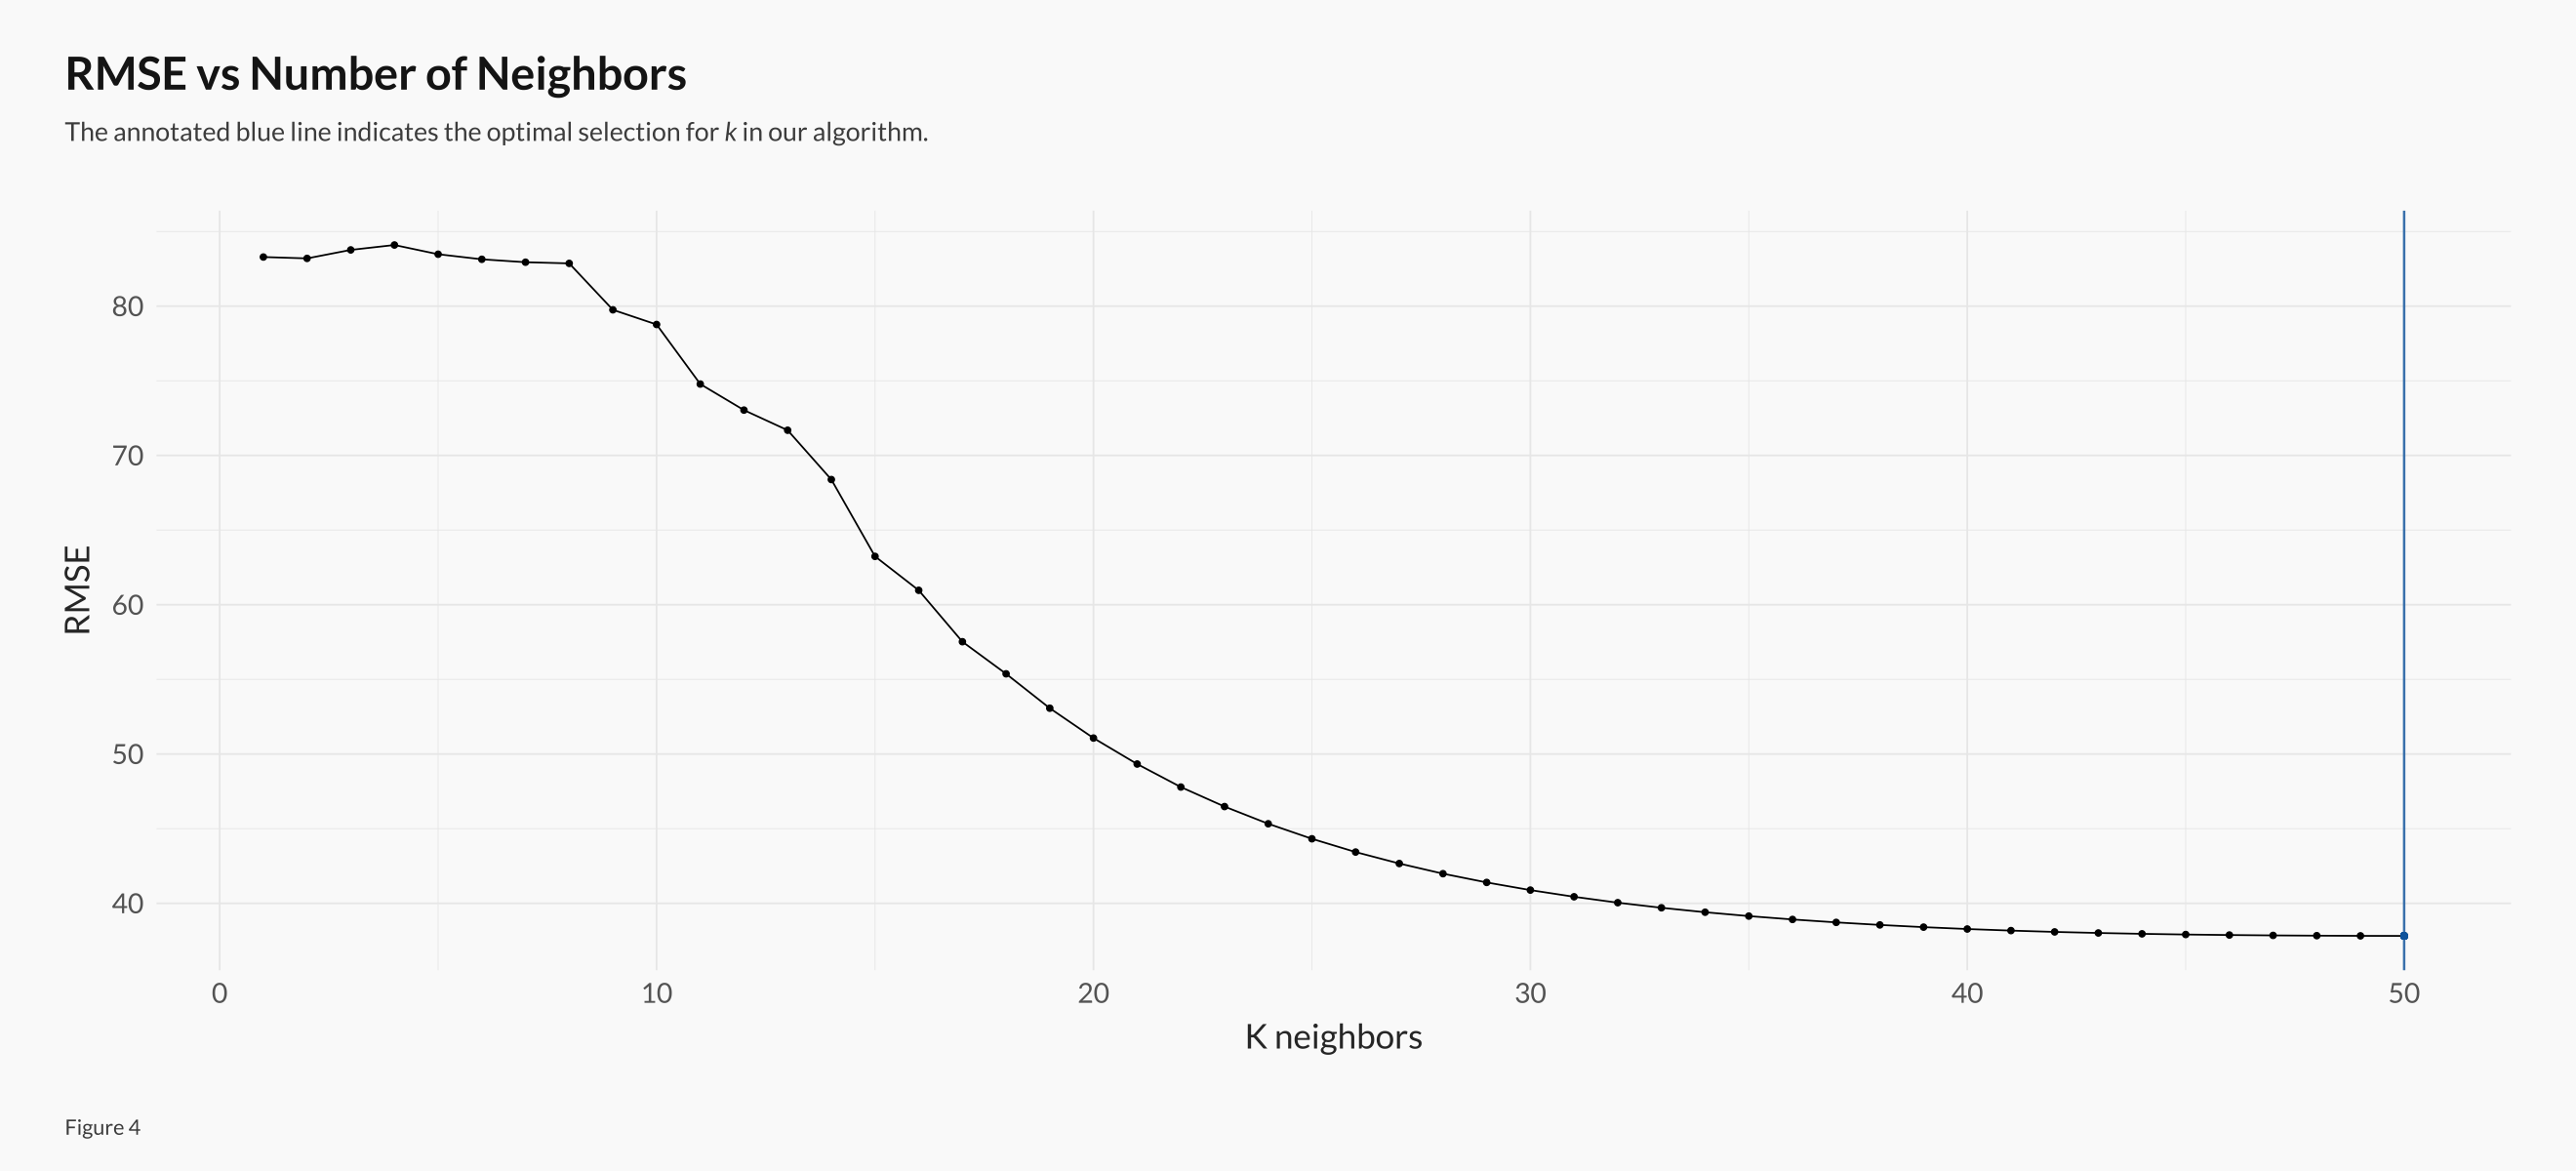

In [98]:
# Plot RMSE vs K
rmse_vs_k_plot <- knn_fit |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    geom_point(color = annotation_colour, mapping = aes(x=optimal_k, y=optimal_mean)) +
    geom_vline(xintercept = optimal_values$neighbors, color = annotation_colour, alpha = 0.8, linewidth=0.7) +
    labs(title = "RMSE vs Number of Neighbors", subtitle ="The annotated blue line indicates the optimal selection for <i>k</i> in our algorithm.", x = "K neighbors", y = "RMSE", caption = "Figure 4")

rmse_vs_k_plot

Now that we have a number for $k$, we can use it in a new model for prediction using our testing data. This new model has an RMSE of ~32.46, which is reflective that there is some relationship between our predictors though the model is still struggling to predict the contributions from our testing data.

In [99]:
# Use optimized values
optimized_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = optimal_k) |>
    set_engine("kknn") |>
    set_mode("regression")

optimized_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(optimized_spec) |>
    fit(training_data)

optimized_fit_predictions <- optimized_fit |>
    predict(testing_data) |>
    bind_cols(testing_data) 

optimized_fit_metrics <- optimized_fit_predictions |>
    metrics(truth = played_hours, estimate = .pred)

optimized_fit_metrics

Warning message:
“!  The following column has zero variance so scaling cannot be used:
  gender_Other.
ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
  before normalizing.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,39.5455125
rsq,standard,0.7758006
mae,standard,22.3922078


To contextualize these metrics, Figure 5 displays the predicated versus actual hours played on the server, with a line to indicate what a "perfect" model would predict (one with an RMSPE of 100).

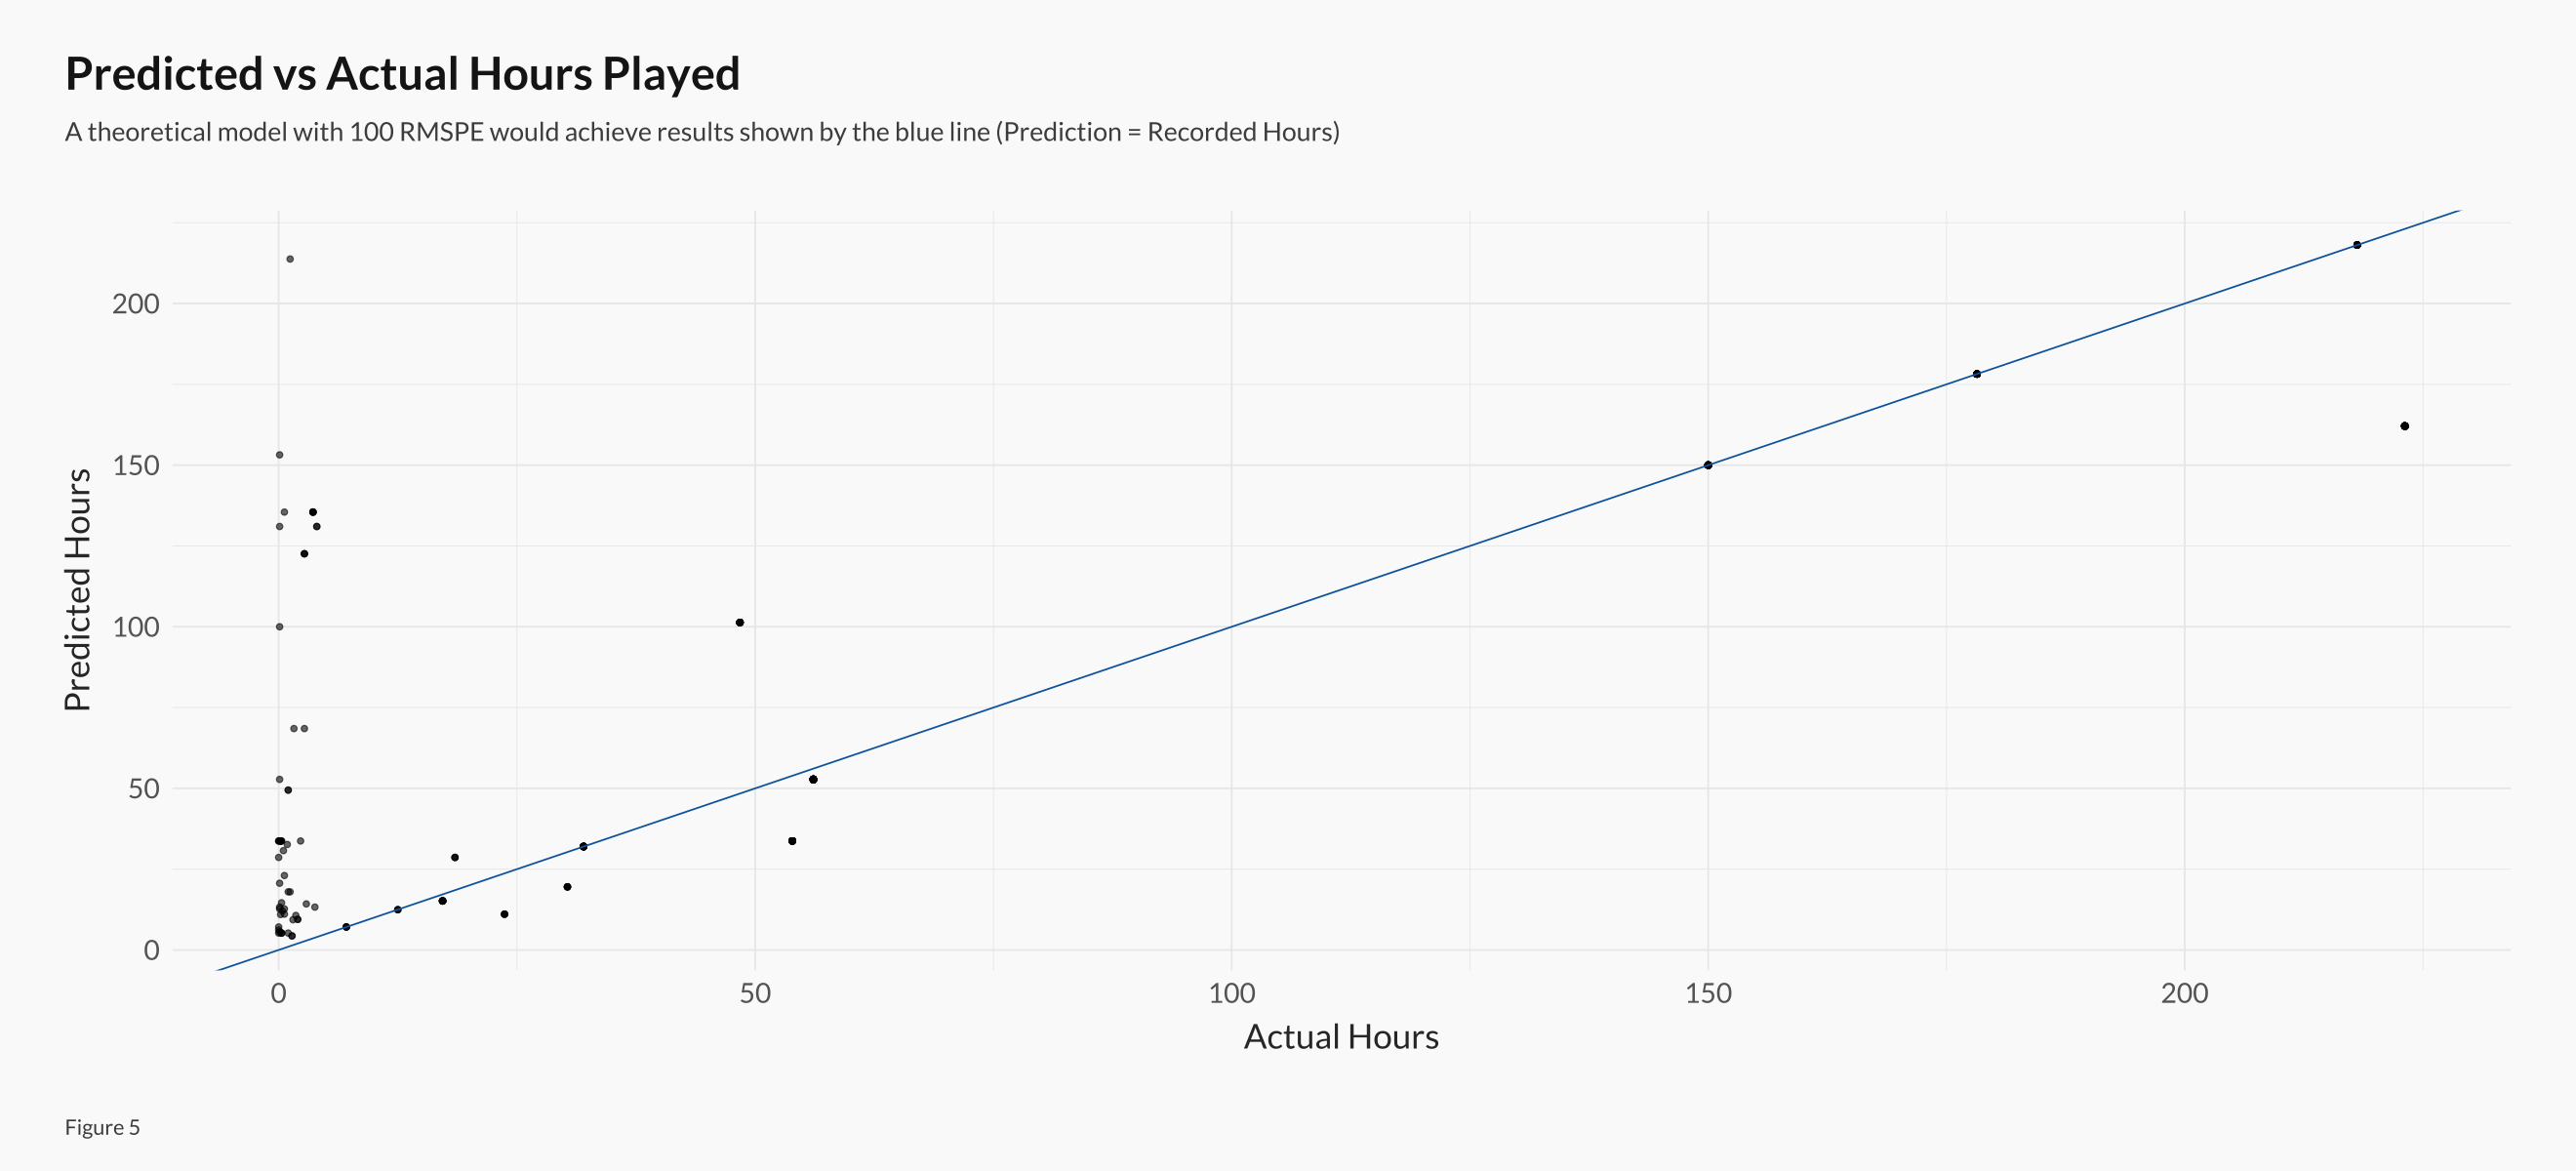

In [100]:
# Vizualize regression results compared to known testing data
optimized_fit_predictions |>
    ggplot(aes(x = played_hours, y = .pred)) +
    geom_point(alpha = 0.6) +
    geom_abline(color = annotation_colour) +
    labs(title = "Predicted vs Actual Hours Played", subtitle = "A theoretical model with 100 RMSPE would achieve results shown by the blue line (Prediction = Recorded Hours)",
         x = "Actual Hours", y = "Predicted Hours", caption = "Figure 5")

### Discussion 💬

<!-- summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to? -->


#### Our findings 🔎
The results of our KNN regression using a players age, gender, and experience as predictors for their total played hours resulted in a model with an RMSPE between 30 - 40 when run on testing data. We found that the model was somewhat accurate for individual players that were part of larger demographics (such as university-aged males with Regular experience in MineCraft). The model over-estimated the hours played by most players, which could be the result of the data including many players who contributed minimal or no hours to the server.

These results are within the realm of our expectations, as sampling bias and volunteer buy-in may have dramatically skewed the data collected by the server. There is already a notable gender-bias in gaming (CITATION NEEDED), which may be exasperated by the voluntary nature of the original study.

#### The impacts 💫
Using the results of this analysis, we can make a strong inference that gender, age, and experience play a part in how long players can be expected to contribute to the PLAICraft server.

With the help of Figures 2 through 5, we can see that researchers should be focusing their recruiting efforts on Male, Amateur players aged 16 - 21 (CHECK THIS) as they are the largest contributing demographic on the server.

These results also point towards a need for inclusivity within the research study, as just under 19 percent of players identified as female, with a similar proportion reporting another gender identity.

#### Future research 🔭
The findings of this analysis could play a role in future research by providing the foundation for further refinements of a regression model, or more in-depth analysis of the characteristics and communities visible on the server. These efforts could be better supported with a larger dataset, as there were only 196 recorded players and of those only XXX played for more that one hour.

### References 📚

<a id="1">[1]</a> *Minecraft* (n.d.). Wikipedia. Retrieved May 28, 2025, from https://www.wikipedia.org/wiki/Minecraft

<a id="2">[2]</a> *Best-selling videogame.* (n.d.). Guinness World Records. Retrieved May 28, 2025, from https://www.guinnessworldrecords.com/world-records/best-selling-video-game.html

<a id="3">[3]</a> *Free Minecraft For AI Research.* (n.d.). Retrieved June 11, 2025, from https://plaicraft.ai/

<a id="4">[4]</a>*Pacific Laboratory for Artificial Intelligence.* (2024, October 30). Pacific Laboratory for Artificial Intelligence. https://plai.cs.ubc.ca/
